# Exploring Fire Station GEOIDs.

This notebook confirms that fire station *GEOID10* values look reasonable.

In [1]:
import matplotlib.pyplot as plt
from src.data import raw
from src.data import fire_stations

In [2]:
%load_ext autoreload
%autoreload 2

## Read and prep source data.

First, we read the fire station data.

In [3]:
# Map FIPS codes to state abbreviations (e.g. {01: AL, ...})
fips_map = {v: k for k, v in raw.STATES.items()}

# Read fire station data.
stations = fire_stations.read()

# Extract FIPS code and state name from GEOID10.
stations["geoid10_fips"] = stations.GEOID10.str[:2]
stations["geoid10_state"] = stations.geoid10_fips.map(fips_map)

# Subset to just the stations with DC GEOIDs.
dc_stations = stations.loc[stations.geoid10_state == "DC", :]

Next, we read some DC Census tract polygons for comparison.

In [4]:
def has_station(x, y):
    """Identify census tracts with fire stations."""
    mapping = {True: "Station", False: "No Station"}
    return x.GEOID10.isin(y.GEOID10).map(mapping)

# Read DC census tracts.
dc_tracts = raw.read_shapefiles(["DC"])

# Identify census tracts that supposedly have stations.
dc_tracts["has_station"] = has_station(dc_tracts, stations)

## Get a feel for *GEOID10* values.

Looks like the GEOID values are reasonable.

In [5]:
# All stations have a GEOID10 value.
stations.GEOID10.notna().all()

True

In [6]:
# States with the most fire stations. Seems plausible.
(stations.geoid10_state.value_counts().head())

CA    3209
NY    2851
TX    2714
PA    2708
NC    1947
Name: geoid10_state, dtype: int64

## Visualize DC as a spot check.

And the fire stations seem to match up with the right Census tracts.

Text(104.64080411403188, 0.5, 'Latitude')

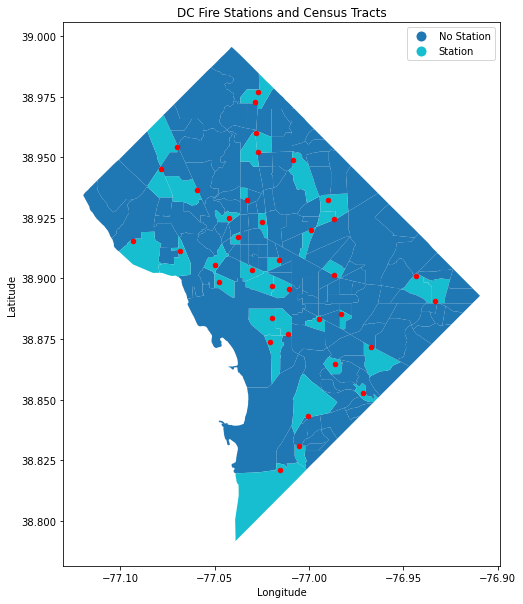

In [7]:
# Point locations of fire stations.
points = (fire_stations.calculate_points(dc_stations.Longitude, 
                                         dc_stations.Latitude,
                                         crs=dc_tracts.crs))

# Set up the plot.
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")

# Plot the census tracts.
dc_tracts.plot(ax=ax, column="has_station", categorical=True, legend=True)

# Plot fire station locations.
points.plot(ax=ax, color="red", markersize=20)

# Adjust plot title and labels.
ax.set_title("DC Fire Stations and Census Tracts")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")